## Exercise
  
Gunakan cancer data untuk melakukan prediksi kemungkinan suatu tumor merupakan tumor ganas menggunakan model logistic regresi dan KNN. Pakai hanya data dengan "_mean" sebagai feature.  

Gunakan validasi train test split untuk mencari keakuratan prediksi kalian, dengan jumlah data test 20% dan random state 2020.

Manakan model terbaik untuk memprediksi data cancer berdasarkan accuracynya?

kalau ada missing data, didrop dulu saja

In [35]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor # calc VIF
from sklearn.model_selection import train_test_split # membagi data menjadi data test dan data train
from sklearn.metrics import accuracy_score # menilai seberapa akurat model kita
from sklearn.neighbors import KNeighborsClassifier # untuk model KNN
from sklearn.preprocessing import MinMaxScaler # normalisasi data

In [2]:
cancer = pd.read_csv('cancer_data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# ubah data target menjadi angka
cancer['diagnosis'] = [1 if i=='M' else 0 for i in cancer['diagnosis']]

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# tentukan X dan y

X = cancer[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

y = cancer['diagnosis']

In [7]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [8]:
# melihat perbandingan untuk data target

y.value_counts()

# 0= benign
# 1= melignant
# perbandingan benign:melignant sekitar 7:4

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, 
    test_size = 0.2, 
    random_state = 666
)

In [10]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606
279,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853
117,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768
83,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224
...,...,...,...,...,...,...,...,...,...,...
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890
260,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.15190,0.09333,0.1814,0.05572
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656


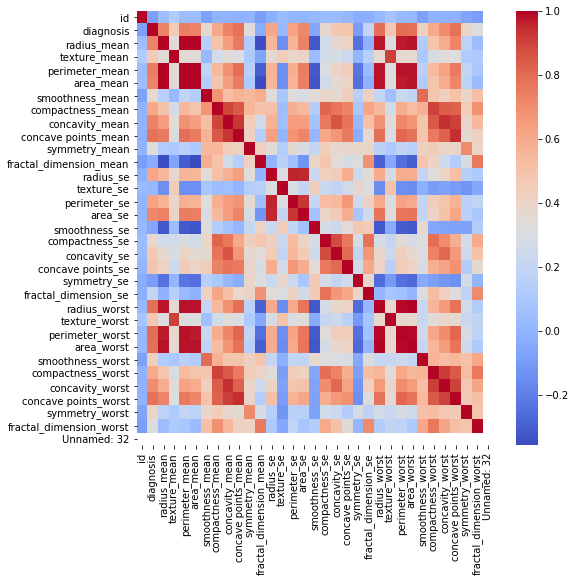

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(cancer.corr(method='spearman'), cmap='coolwarm')

In [41]:
cancer.corr(method='spearman').head(12)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,-0.079866,0.043740,0.125809,0.043374,0.042829,-0.073225,-0.002247,0.000657,-0.003174,...,0.077484,0.026199,0.023137,-0.080853,-0.011300,-0.013284,-0.012798,-0.064977,-0.090637,NaN
diagnosis,-0.079866,1.000000,0.732785,0.461971,0.748496,0.734122,0.371892,0.609288,0.733308,0.777877,...,0.476720,0.796319,0.786902,0.425513,0.606810,0.705734,0.781674,0.396843,0.311477,NaN
radius_mean,0.043740,0.732785,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,...,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,NaN
texture_mean,0.125809,0.461971,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,...,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,NaN
perimeter_mean,0.043374,0.748496,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,...,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,NaN
area_mean,0.042829,0.734122,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,...,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,NaN
smoothness_mean,-0.073225,0.371892,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,...,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,NaN
compactness_mean,-0.002247,0.609288,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,...,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986,NaN
concavity_mean,0.000657,0.733308,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,...,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838,NaN
concave points_mean,-0.003174,0.777877,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,...,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110,NaN


## Modeling

In [11]:
# fitting data (model mempelajari data)

sm_logit_train = sm.Logit(y_train, sm.add_constant(X_train))
result_train = sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.130243
         Iterations 11


In [12]:
print(result_train.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                           10
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.8029
Time:                        09:33:56   Log-Likelihood:                -59.261
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                 2.026e-97
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -23.2604     15.594     -1.492      0.136     -53.825       7.304
radius_mean                1.6541      4.267      0.388      0.698      -6.709      10.017
text

In [13]:
def calc_vif(X):

    # calculating vif
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

    return(vif)

In [14]:
calc_vif(X)

,variables,VIF
0,radius_mean,27447.771770
1,texture_mean,23.933372
2,perimeter_mean,29501.347528
3,area_mean,157.954975
4,smoothness_mean,136.564939
5,compactness_mean,81.953895
6,concavity_mean,26.049705
7,concave points_mean,52.400513
8,symmetry_mean,74.980219
9,fractal_dimension_mean,193.849464


In [15]:
# coba eliminasi feature yg mempunyai VIF besar
calc_vif(X.drop(columns=['radius_mean','perimeter_mean','smoothness_mean','fractal_dimension_mean']))

,variables,VIF
0,texture_mean,19.564876
1,area_mean,19.044183
2,compactness_mean,31.976461
3,concavity_mean,20.943875
4,concave points_mean,37.207749
5,symmetry_mean,25.804076


In [16]:
# coba ambil feature yg mempunyai P-value <0.05
calc_vif(X[['texture_mean','concave points_mean']])

,variables,VIF
0,texture_mean,2.836017
1,concave points_mean,2.836017


# Validation

In [17]:
# kita pakai X dan y yang tidak terdapat multicollinearity

X = cancer[['texture_mean','concave points_mean']]
y = cancer['diagnosis']

In [18]:
# Splitting data dengan X yg baru

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, 
    test_size = 0.2, 
    random_state = 666
)

## Logistic Regression

In [19]:
# fitting data (model mempelajari data)

sm_logit_train = sm.Logit(y_train, sm.add_constant(X_train))
result_train = sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.191864
         Iterations 9


In [20]:
print(result_train.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.7097
Time:                        09:33:59   Log-Likelihood:                -87.298
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                 2.113e-93
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.1919      1.445     -8.438      0.000     -15.024      -9.360
texture_mean            0.3078      0.053      5.822      0.000       0.204       0.411
concave points_m

In [21]:
# memprediksi hasil probability dari X_test
y_predict_proba = result_train.predict(sm.add_constant(X_test))

# memprediksi yg probabilitynya > 50%, akan diubah menjadi 1 (melignant)
y_predict_class = np.where(y_predict_proba>0.5, 1, 0)

In [22]:
y_predict_proba

523    0.101240
80     0.038282
33     0.989051
218    0.985635
183    0.007092
         ...   
73     0.164492
64     0.947022
367    0.012572
17     0.996816
163    0.101935
Length: 114, dtype: float64

In [23]:
y_predict_class

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

In [24]:
# kita cek akurasinya

print('akurasi model yg kita pakai:', accuracy_score(y_test, y_predict_class))

akurasi model yg kita pakai: 0.9649122807017544


## KNN (K Nearest Neighbors)

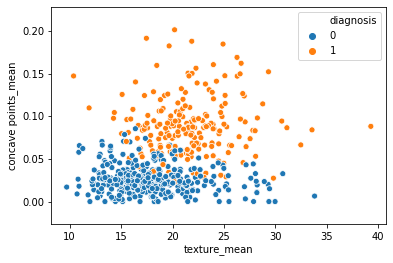

In [25]:
sns.scatterplot(x='texture_mean', y='concave points_mean', data=cancer, hue='diagnosis')

In [26]:
# cek apakah ada null value
X.isnull().sum()

texture_mean           0
concave points_mean    0
dtype: int64

In [27]:
# Classification dengan KNN

# fitting data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# memprediksi hasil probability dari X_test
y_predict_class = knn.predict(X_test)

In [28]:
# cek akurai dgn KNN

print('akurasi model yg kita pakai dengan KNN:', accuracy_score(y_test, y_predict_class))

akurasi model yg kita pakai dengan KNN: 0.8070175438596491


In [29]:
# Coba data featurenya (X) dinormalisasi dulu, barang kali sebelumnya datanya bias

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# fitting data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# memprediksi hasil probability dari X_test
y_predict_class = knn.predict(X_test_scaled)

In [31]:
# cek akurai dgn KNN ketika data feature sudah dinormalisasi

print('akurasi model yg kita pakai dengan KNN:', accuracy_score(y_test, y_predict_class))

akurasi model yg kita pakai dengan KNN: 0.9298245614035088


# Kesimpulan

- Akurasi dengan Logistic Regression    : 0.964
- Akurasi dengan KKN                    : 0.807
- Akurasi dengan KNN normalized         : 0.929

Jadi prediksi paling akurat untuk dataset cancer ini adalah dengan model Logistic Regression